## 0. Описание задачи

Задача заключается в оценке качества воды по содержащимся в ней различным веществам.

Объект датасета представляет собой взятую пробу воды, которая характеризуется следующими признаками:
- 20 различных веществ, от которых может зависеть качество воды:
    - aluminium
    - ammonia
    - arsenic
    - barium
    - cadmium
    - chloramine
    - chromium
    - copper
    - flouride
    - bacteria
    - viruses
    - lead
    - nitrates
    - nitrites
    - mercury
    - perchlorate
    - radium
    - selenium
    - silver
    - uranium
- бинарный признак, показывающий, является ли рассматриваемая проба воды безопасной (пригодной для питья)

## 1. Чтение данных

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
%matplotlib inline

In [5]:
url = "https://raw.githubusercontent.com/iamshchikov-i/ML_Course/main/waterQuality.csv"
data_raw = pd.read_csv(url)

In [6]:
data_raw

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


## 2. Обработка пропущенных (невалидных) значений

В данных присутствуют некоторые невалидные объекты с признаком *is_safe* = *#NUM!*

Необходимо удалить соответствующие объекты (3 шт.).

In [7]:
rows_to_drop = data_raw[
    ~((data_raw['is_safe'] == '0') | (data_raw['is_safe'] == '1'))].index
data = data_raw.drop(rows_to_drop)
data.shape

(7996, 21)

Категориальных признаков нет. Однако, некоторые столбцы имеют тип *object* из-за наличия невалидных значений (удалены на предыдущем шаге).

Приведем соответствующие столбцы к числовому типу *float64*

In [8]:
for feature in data.columns:
    if data[feature].dtype == 'object':
        data[feature] = data[feature].astype('float64')

for feature in data.columns:
    print(data[feature].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


## 3. Обработка категориальных признаков

Категориальные признаки отсутствуют.

## 4. Визуализация

Построим график зависимости для содержания мышьяка и признака безопасности воды:

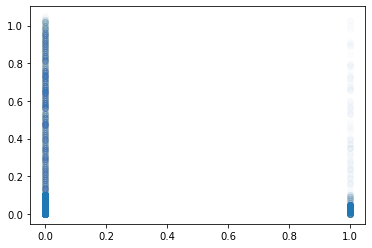

In [9]:
plt.scatter(data['is_safe'], data['arsenic'], alpha=0.01)
pass

В большинстве проб воды, качество которой является приемлемым, содержание мышьяка (*arsenic*) ниже, чем *~0.1*

Построим график зависимости для содержания нитритов и признака безопасности воды:

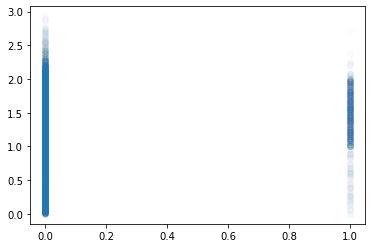

In [10]:
plt.scatter(data['is_safe'], data['nitrites'], alpha=0.01)
pass

В большинстве проб воды, качество которой является приемлемым, содержание нитритов (*nitrites*) находится в диапазоне *~[1.0, 2.0]*

Вычислим основные характеристики:

In [12]:
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


Вычислим матрицу корреляции:

In [13]:
corr_mat = data.corr()
corr_mat

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067369,0.225725,0.294091,-0.099902,0.369221,0.353134,0.168569,-0.009877,-0.078324,...,0.020957,-0.003851,0.237439,-0.003129,0.362986,0.243396,-0.003651,0.334923,0.014723,0.333974
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,...,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635,-0.022919
arsenic,0.225725,0.046783,1.000000,0.362925,0.334782,0.356509,0.312421,-0.036488,0.003731,0.035642,...,-0.087669,0.027533,0.305113,-0.015288,0.332228,0.218328,-0.006993,0.307794,0.001469,-0.123362
barium,0.294091,0.070099,0.362925,1.000000,-0.037901,0.446869,0.415937,0.065277,-0.018637,0.101304,...,-0.042829,-0.011423,0.312783,0.006165,0.462207,0.286890,0.035222,0.431542,-0.002541,0.090858
cadmium,-0.099902,-0.006422,0.334782,-0.037901,1.000000,-0.144366,-0.157716,-0.109252,0.005005,-0.092133,...,-0.035313,0.020232,-0.015829,-0.016169,-0.149269,-0.098936,0.009933,-0.155441,-0.005911,-0.256034
chloramine,0.369221,0.104775,0.356509,0.446869,-0.144366,1.000000,0.555846,0.118975,0.004254,0.154443,...,-0.030241,-0.001619,0.379916,-0.021198,0.588683,0.389119,0.011435,0.522372,-0.007648,0.186704
chromium,0.353134,0.124782,0.312421,0.415937,-0.157716,0.555846,1.000000,0.113003,-0.002424,0.141937,...,-0.050254,-0.012843,0.335940,-0.022541,0.524432,0.315484,0.030598,0.510705,-0.005472,0.182306
copper,0.168569,0.015953,-0.036488,0.065277,-0.109252,0.118975,0.113003,1.000000,0.011647,0.149271,...,0.121762,0.002259,0.162092,0.017785,0.104527,0.026534,-0.003356,0.089241,0.006802,0.029498
flouride,-0.009877,-0.028221,0.003731,-0.018637,0.005005,0.004254,-0.002424,0.011647,1.000000,0.013984,...,0.012146,-0.008245,-0.016591,-0.004263,-0.016352,0.007683,0.022726,0.014446,0.016849,0.006550
bacteria,-0.078324,0.063603,0.035642,0.101304,-0.092133,0.154443,0.141937,0.149271,0.013984,1.000000,...,-0.027179,-0.033993,0.246463,-0.004406,0.147526,0.099080,-0.006779,0.148199,0.045077,-0.022077


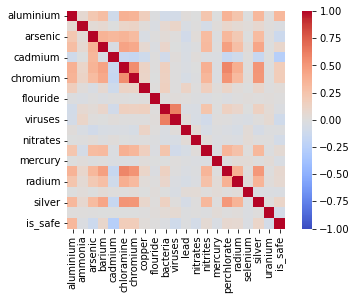

In [14]:
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
pass

In [15]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

bacteria     viruses        0.618535
chloramine   perchlorate    0.588683
             chromium       0.555846
chromium     perchlorate    0.524432
chloramine   silver         0.522372
chromium     silver         0.510705
perchlorate  silver         0.504539
dtype: float64

В данном случае существует корреляция между содержанием бактерий и вирусов в пробе. Вероятно, чем грязнее вода, тем выше в ней содержание обоих признаков.

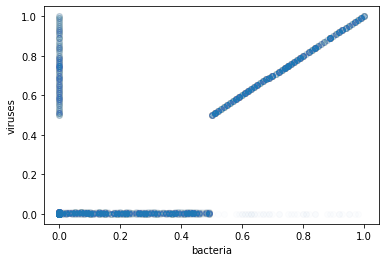

In [22]:
plt.scatter(data['bacteria'], data['viruses'], alpha=0.01)
plt.xlabel('bacteria')
plt.ylabel('viruses')
pass

## 5. Нормализация

In [25]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7996.000000,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,...,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03,7.996000e+03
mean,-1.421796e-16,1.706156e-16,-5.687185e-17,-1.137437e-16,-2.701413e-16,0.000000,-1.137437e-16,-8.530778e-17,1.315162e-16,1.848335e-16,...,1.777245e-16,1.270731e-16,1.421796e-16,-1.866108e-17,1.706156e-16,-8.530778e-17,-3.776647e-17,-1.706156e-16,-1.550647e-16,8.530778e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.266605e-01,-1.617111e+00,-6.391775e-01,-1.289173e+00,-1.187357e+00,-0.848232,-9.136804e-01,-1.233089e+00,-1.772174e+00,-9.703093e-01,...,-1.709359e+00,-1.771796e+00,-2.319752e+00,-1.750033e+00,-9.308286e-01,-1.257146e+00,-1.726723e+00,-1.029552e+00,-1.660312e+00,-3.587823e-01
25%,-4.950480e-01,-8.673017e-01,-5.204279e-01,-8.287330e-01,-9.654388e-01,-0.809279,-7.289491e-01,-1.095389e+00,-8.363028e-01,-9.703093e-01,...,-8.841699e-01,-8.695904e-01,-5.753758e-01,-7.389592e-01,-8.081523e-01,-9.041251e-01,-1.031635e+00,-7.509395e-01,-9.169828e-01,-3.587823e-01
50%,-4.713387e-01,-1.669251e-02,-4.412615e-01,-3.107377e-01,-7.776576e-02,-0.641782,-5.811641e-01,-8.558893e-02,-3.779822e-03,-3.026241e-01,...,4.416754e-02,1.998391e-02,1.572622e-01,-6.490972e-02,-4.929816e-01,-2.196079e-01,1.099658e-02,-4.723272e-01,1.980103e-01,-3.587823e-01
75%,-3.053731e-01,8.845985e-01,-2.433455e-01,7.519748e-01,7.544278e-01,0.803367,7.119546e-01,8.936112e-01,8.919001e-01,8.809997e-01,...,8.865478e-01,8.644480e-01,7.503501e-01,9.461645e-01,7.361841e-01,7.533536e-01,7.060846e-01,6.421218e-01,9.413390e-01,-3.587823e-01
max,3.464415e+00,1.752665e+00,3.517058e+00,2.772567e+00,2.418815e+00,2.532871,2.411482e+00,1.826911e+00,1.672749e+00,2.064623e+00,...,1.728928e+00,1.806350e+00,2.791270e+00,1.620214e+00,2.461708e+00,2.182660e+00,1.748717e+00,2.453102e+00,1.684668e+00,2.786857e+00


## 6. Разбиение данных на обучающую и тестовую выборки

In [26]:
X = data_stand.drop(['is_safe'], axis=1)
y = data['is_safe']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(5997, 1999)

## 7. Классификация методом ближайших соседей

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.set_params(n_neighbors=5)
knn.fit(X_train.values, y_train)

KNeighborsClassifier()

Запуск инференса на обучающей и тестовой выборках с параметром **n_neighbors=5**:

In [29]:
y_train_pred = knn.predict(X_train.values)
y_test_pred = knn.predict(X_test.values)

## 8. Ошибка на обучающей и тестовой выборках

Проверка качества с параметром **n_neighbors=5**:

In [30]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.06269801567450392, 0.09854927463731866)

Проверка качества с параметром **n_neighbors=7**:

In [31]:
knn.set_params(n_neighbors=7)
knn.fit(X_train.values, y_train)

y_train_pred = knn.predict(X_train.values)
y_test_pred = knn.predict(X_test.values)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.06820076705019176, 0.09304652326163082)

Проверка качества с параметром **n_neighbors=10**:

In [32]:
knn.set_params(n_neighbors=10)
knn.fit(X_train.values, y_train)

y_train_pred = knn.predict(X_train.values)
y_test_pred = knn.predict(X_test.values)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.07620476905119226, 0.09654827413706854)

Проверка качества с параметром **n_neighbors=7** и **p=3**:

In [33]:
knn.set_params(n_neighbors=7, p=3)
knn.fit(X_train.values, y_train)

y_train_pred = knn.predict(X_train.values)
y_test_pred = knn.predict(X_test.values)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0670335167583792, 0.09854927463731866)

**Подытог**: для классификатора knn наименьшая ошибка на тестовой выборке достигается при параметрах **n_neighbors=7** и **p=2**.

## 9. Инференс на других классификаторах

## Классификация методом SVC

In [34]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.045356011339002834, 0.06503251625812906)

## Классификация методом Random Forest

In [35]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 250)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.04102051025512756)

## Классификация методом Extremely Randomized Trees

In [36]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 250)
ert.fit(X_train, y_train)

y_train_pred = ert.predict(X_train)
y_test_pred = ert.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.07553776888444222)

## Классификация методом AdaBoost

In [37]:
ada = ensemble.AdaBoostClassifier(n_estimators = 250)
ada.fit(X_train.values, y_train)

y_train_pred = ada.predict(X_train.values)
y_test_pred = ada.predict(X_test.values)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.053860263465065866, 0.07303651825912956)

## Классификация методом GBT

In [38]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 250)
gbt.fit(X_train, y_train)

y_train_pred = gbt.predict(X_train)
y_test_pred = gbt.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.013340003335000834, 0.03651825912956478)

**Подытог**: наименьшую ошибку на тестовой выборке показывает классификатор **GBT** с параметром **n_estimators = 250**

## 10. Борьба с несбалансированностью классов

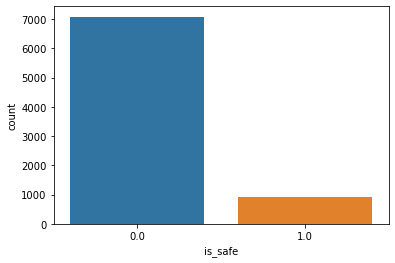

In [39]:
sns.countplot(x='is_safe', data=data)
pass

In [40]:
non_safe_count, safe_count = data['is_safe'].value_counts()

class_0 = data[data['is_safe'] == 0]
class_1 = data[data['is_safe'] == 1]

class_0_balanced = class_0.sample(safe_count)

balanced_data = pd.concat([class_0_balanced, class_1], ignore_index=True, sort=False)
balanced_data.shape

balanced_data_stand = (balanced_data - balanced_data.mean(axis = 0))/balanced_data.std(axis = 0)

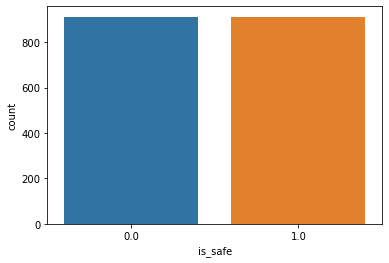

In [41]:
sns.countplot(x='is_safe', data=balanced_data)
pass

Подготовка данных для инференса:

In [42]:
X = balanced_data_stand.drop(['is_safe'], axis=1)
y = balanced_data['is_safe']

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(1368, 456)

## KNN

In [46]:
knn.set_params(n_neighbors=7)
knn.fit(X_train.values, y_train)

y_train_pred = knn.predict(X_train.values)
y_test_pred = knn.predict(X_test.values)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.15204678362573099, 0.20394736842105263)

## GBT

In [45]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 250)
gbt.fit(X_train, y_train)

y_train_pred = gbt.predict(X_train)
y_test_pred = gbt.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.06359649122807018)

В случае сбалансированных данных ошибка на тестовой выборке увеличилась. Скорее всего, это связано с существенным уменьшением объема данных после балансировки:
- до балансировки N_train, N_test **(5997, 1999)**
- после балансировки N_train, N_test **(1368, 456)**

Объем сбалансированных данных существенно уменьшился потому, что изначально разбиение двух классов составляло **88.6%** vs **11.4%**. Следовательно, во время балансировки объем данных первого класса уменьшался, чтобы количество его объектов соответствовало количеству объектов второго класса.

## 11. Исключение коррелированных переменных

In [47]:
X = data_stand.drop(['bacteria', 'is_safe'], axis=1)
y = data['is_safe']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(5997, 1999)

## KNN

In [49]:
knn.set_params(n_neighbors=7)
knn.fit(X_train.values, y_train)

y_train_pred = knn.predict(X_train.values)
y_test_pred = knn.predict(X_test.values)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.07120226780056695, 0.09254627313656828)

## GBT

In [50]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 250)
gbt.fit(X_train, y_train)

y_train_pred = gbt.predict(X_train)
y_test_pred = gbt.predict(X_test)

np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.014507253626813406, 0.03851925962981491)

Исключение коррелированной переменной приводит к небольшому увеличению ошибки на обучающей и валидационной выборках. Вероятнее всего, это связано с тем, что коэффициент корреляции **0.618535** между двумя наиболее коррелированными величинами недостаточно высок для того, чтобы можно было исключать один из коррелированных признаков. 

## 12. Общие выводы

В заключение можно подытожить:
- для текущей задачи оценки качества воды при текущих входных данных наименьшую ошибку показал классификатор **GBT** с параметром **n_estimators = 250**. Ошибки (0.013340003335000834, 0.03651825912956478);
- для текущей задачи оценки качества воды при текущих входных данных наибольшую ошибку показал классификатор **KNN** с параметром **n_neighbors = 5**. Ошибки: (0.06269801567450392, 0.09854927463731866);
- приведение данных к сбалансированности классов не приводит к уменьшению ошибки классификации вследствие существенного сокращения объема данных после балансировки;
- исключение коррелированных признаков не прикодит к уменьшению ошибки классификации, так как коэффициент корреляции между двумя наиболее коррелированными величинами недостаточно высок для того, чтобы можно было исключать один из коррелированных признаков.